# Building Gradient Boosted Decision Trees Demo

In this demo, will you will see how to train two gradient boosted decision trees and compare their performances. 

**<font color='red'>Note: Some of the code cells in this notebook may take a while to run.</font>**

### Import Packages

Before you get started, import a few packages. Run the code cell below. 

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

We will also import the scikit-learn `GradientBoostingClassifier`, the `train_test_split()` function for splitting the data into training and test sets, and the functions `roc_curve` and `auc` to evaluate the model. 

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

## Step 1: Build Your DataFrame and Define Your ML Problem

We will work with the "cell2celltrain" data set. This data set is already preprocessed, with the proper formatting, outliers, and missing values taken care of, and all numerical columns scaled to the [0, 1] interval. One-hot encoding has been performed on all categorical columns. Run the cell below to load the data set and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data_GBDT", "cell2celltrain.csv")
df = pd.read_csv(filename, header=0)

#### Define the Label

This is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

Our features will be all of the remaining columns in the dataset.

## Step 2: Create Labeled Examples


In [4]:
y = df['Churn'] 
X = df.drop(columns = 'Churn', axis=1)

## Step 3: Create Training and Test Data Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

## Step 4: Train Two Gradient Boosted Decision Tree (GBDT) Classifiers

A gradient boosted decision tree can be thought of as a sequence of individual decision trees that further refines the model's output prediction at each step. The power of GBDTs is in how they learn and weigh these trees in such a way that they can approximate a wide variety of non-linear functions between inputs $X$ and outputs $Y$. 
</p>

We will use the scikit-learn's `GradientBoostingClassifier`. Please refer to the online [documentation](http://scikit-learn.org/stable/modules/ensemble.html) for a brief overview of scikit-learn's ensemble methods.

The code cell below trains two GBDT models, one with a max depth of 2 and the other with a max depth of 10, and uses the models to make predictions.

In [6]:
from time import process_time
print('Begin GBDT Implementation (this will take a few minutes)...')

# 1. Create the GradientBoostingClassifier model object with a max depth of 2 and assign to variable 'gbdt_2_model'
gbdt_2_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 2)

# 2. Fit the model to the training data 
gbdt_2_model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the result to the 
# variable 'gbdt_2_predictions' 
gbdt_2_preds = gbdt_2_model.predict_proba(X_test)
gbdt_2_predictions = list(gbdt_2_preds[:, -1])

# 4. Create the GradientBoostingClassifier model object with a max depth of 10 and assign to variable 'gbdt_10_model'
gbdt_10_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 10)

# 5. Fit the model to the training data below
gbdt_10_model.fit(X_train, y_train)

# 6. Make predictions on the test data using the predict_proba() method and assign the result to the 
# variable 'gbdt_10_predictions' 
gbdt_10_preds = gbdt_10_model.predict_proba(X_test)
gbdt_10_predictions = list(gbdt_10_preds[:, -1])

print('End')

Begin GBDT Implementation (this will take a few minutes)...
End


## Step 5: Evaluate the Performance Using ROC and AUC

We will now plot two ROC curves for the two GBDT classifiers on the same graph. The code cell below uses the `roc_curve()` function to record the true positive and false positive rates for both models. 

In [7]:
print('Computing ROC Curve...')

# Use roc_curve to record fpr and tpr for gbdt_2_model
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, gbdt_2_predictions)

# Use roc_curve to record fpr and tpr for gbdt_10_model
fpr_10, tpr_10, thresholds_10 = roc_curve(y_test, gbdt_10_predictions)

print('End')

Computing ROC Curve...
End


The code cell below plots the ROC curves for both models. Run the code cell and inspect the results.

Plotting ROC Curve (this will take a few minutes)...


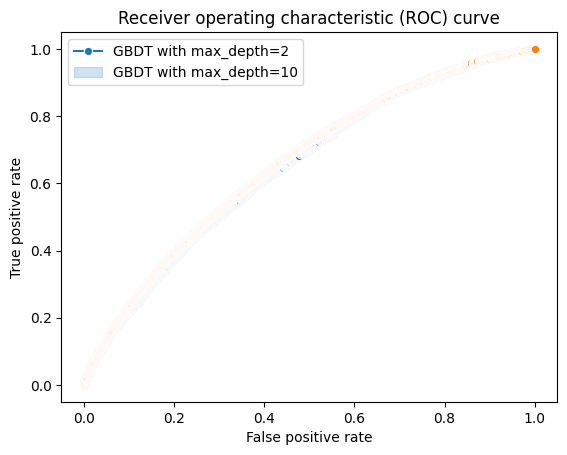

94.52585983276367


In [8]:
import time

t0 = time.time()

print('Plotting ROC Curve (this will take a few minutes)...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_2, y=tpr_2, marker = 'o')
sns.lineplot(x=fpr_10, y=tpr_10, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['GBDT with max_depth=2', 'GBDT with max_depth=10'])
plt.show()

t1 = time.time()
print(t1-t0)



The code cell uses the `auc()` function to compute the areas under each of the receiver operating characteristic (ROC) curves. 


In [9]:
# AUC for gbdt_2_model
auc_2 = auc(fpr_2, tpr_2)
print("AUC of the GBDT model with a max depth of 2 is {:.3f}".format(auc_2))

# AUC for gbdt_10_model
auc_10 = auc(fpr_10, tpr_10)
print("AUC of the GBDT model with a max depth of 10 is {:.3f}".format(auc_10))


AUC of the GBDT model with a max depth of 2 is 0.651
AUC of the GBDT model with a max depth of 10 is 0.661
